<img align="right" src="https://weclouddata.s3.amazonaws.com/images/logos/wcd_logo_new_2.png"  width='15%'>
<br></br><br></br><br></br>

[comment]: <> (The following line is for the LECTURE title)
<p style="text-align:left;"><font size='6'><b> Intro to Linear Regression </b></font></p>

[comment]: <> (The following line is for the TOPIC of the week)
<p style="text-align:left;"><font size='4'><b> Intro to Machine Learning & Regression </b></font></p>

---

<h2 align="center"> About this Notebook </h2>

[comment]: <> (Learning objectives describe what students should know/be able to do..)
[comment]: <> (by the end of the lecture that they may not have been able to do before)
<h3> Learning Objectives: </h3>

By the end of lecture, students will be able to:

- **Segment data** into features and labels, then split it using sklearn
- Train and evaluate a **linear regression model**
- Preprocess data by **scaling**
- Explain the difference between various scaling methods (StandardScaler, MinMaxScaler)
<br></br>


[comment]: <> (A list of the libraries used in the notebook + the import..)
[comment]: <> (for the libraries can be found before the section it's used in as well)
<h3> Libraries Used: </h3>

- Pandas
- Matplotlib
- sklearn
<br></br>


[comment]: <> (ToC shows an overview of the lecture + its subsections)
<h3> Table of Contents: </h3>

- [1. Boston Housing Data](#-1.-Boston-Housing-Data-)
    - [1.1. Exploring the Data](#1.1-Exercise)
    - [1.2. Splitting Data into Training and Test Sets](#Splitting-Data-into-Training-and-Test-Sets)
- [2. Linear Regression](#-2.-Linear-Regression-)
- [3. Scaling Data](#-3.-Scaling-Data-)
<br></br>


[comment]: <> (This section is a summary of the links shared in the notebook, listed in order of appearance)
[comment]: <> (If it is preview material, it will be specified in brackets, e.g. [PREVIEW] at the beginning)
<h3> Readings/References: </h3>

- If you're interested in reading about the toy datasets used in scikit-learn and its characteristics: https://scikit-learn.org/stable/datasets/toy_dataset.html
- Links shared throughout this notebook:
    - [train_test_split Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - [Scaling Data](https://scikit-learn.org/stable/modules/preprocessing.html)
    - [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
<br></br>

---

# Library Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df['MEDV'] = boston.target

NameError: name 'boston' is not defined

In [6]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


---

# <font color='#347B98'> 1. Boston Housing Data </font>

The Boston house-price data has been used in many machine learning papers that address regression problems.
 	
- **CRIM** per capita crime rate by town
- **ZN** proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** proportion of non-retail business acres per town
- **CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX** nitric oxides concentration (parts per 10 million)
- **RM** average number of rooms per dwelling
- **AGE** proportion of owner-occupied units built prior to 1940
- **DIS** weighted distances to five Boston employment centres
- **RAD** index of accessibility to radial highways
- **TAX** full-value property-tax rate per \$10,000
- **PTRATIO** pupil-teacher ratio by town
- **B** "1000(Bk - 0.63)^2" where Bk is the proportion of blacks by town
- **LSTAT** percent lower status of the population
- **MEDV** Median value of owner-occupied homes in $1000’s


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

In [2]:
df=pd.read_csv('bostonhousing.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target


In [4]:
from sklearn import datasets 

boston = datasets.load_boston() # loads the Boston house prices dataset 

df = pd.DataFrame(boston['data'], columns=boston['feature_names'])

df['MEDV'] = boston['target']

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
df.shape # Getting the dimensions of our dataset (rows, columns)

(506, 13)

## 1.1 Exercise

- Explore the data
- Find a column that has a linear relationship with `MEDV`

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


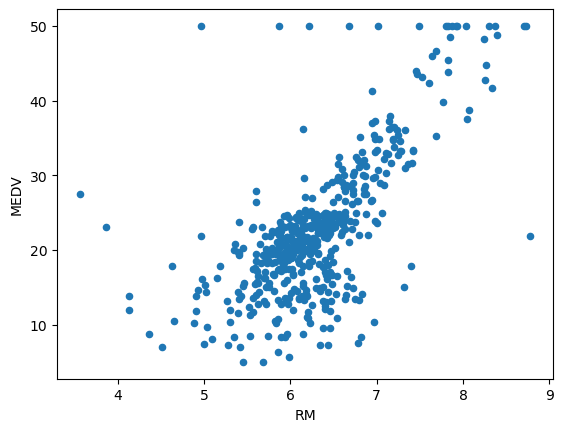

In [11]:
#########################
# Lab - Your Code Below
#########################
df.plot(kind='scatter',x='RM',y='MEDV');
# 'RM'

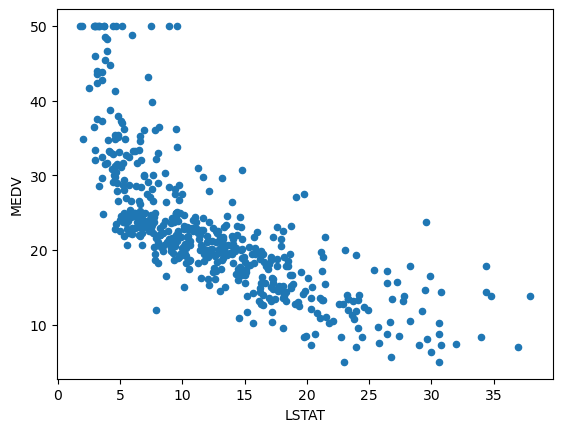

In [17]:
df.plot(kind='scatter',x='LSTAT',y='MEDV');
# LSTAT

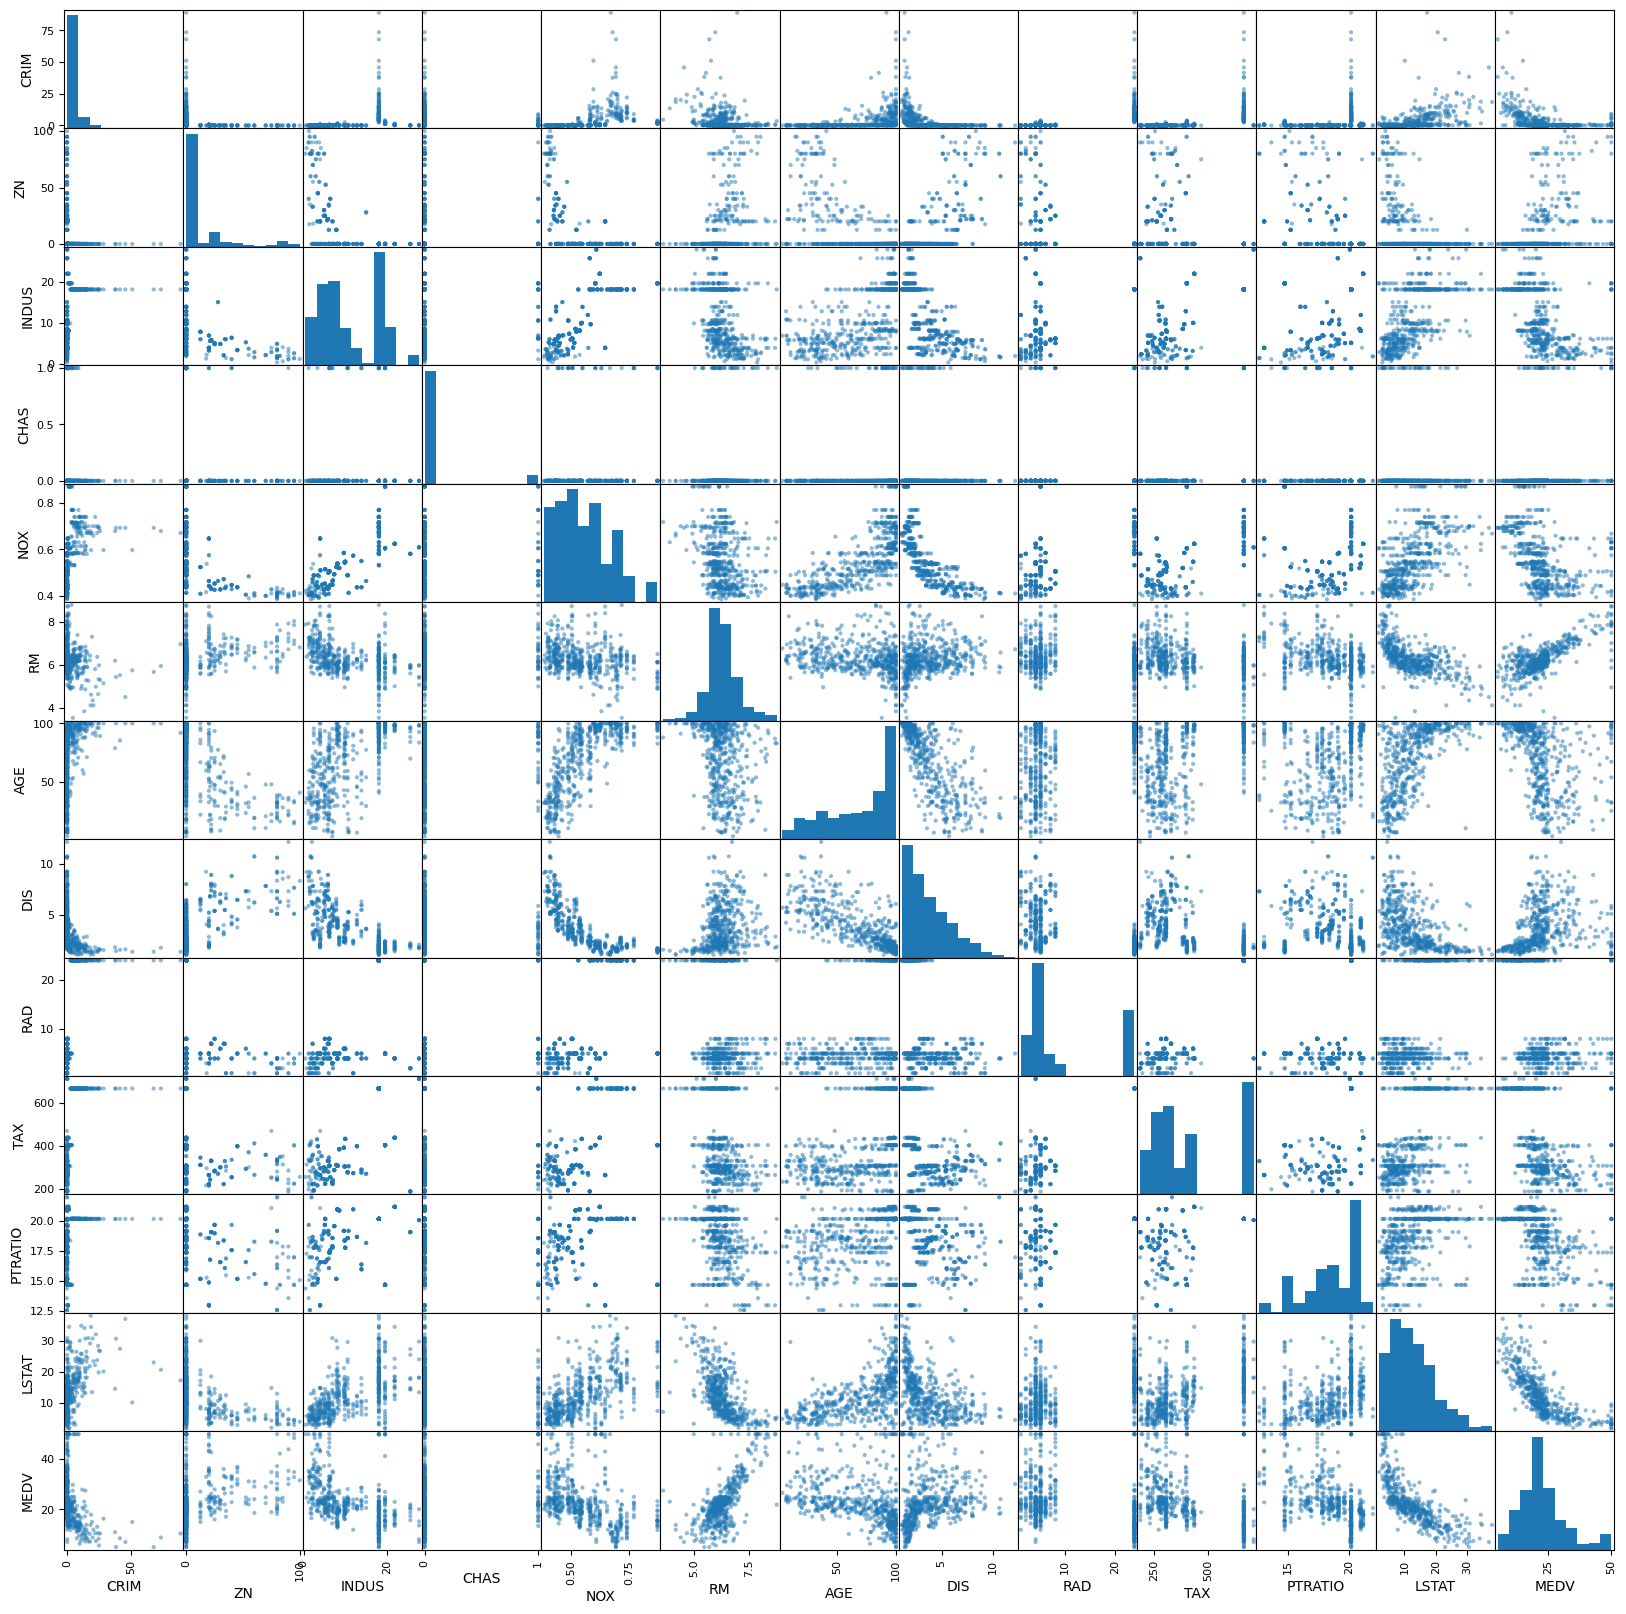

In [24]:
pd.plotting.scatter_matrix(df, figsize=(20,20));

<details>
<summary><i> > Solution (code also provided in cells below for convenience when running)</i></summary>
  
```python
    
# Describing the data with summary statistics
df.describe()
    
# Creating a scatter matrix to view plots of all column combinations   
pd.plotting.scatter_matrix(df, figsize=(20, 20));
    
# Correlation matrix
df.corr().style.background_gradient(cmap='coolwarm', axis=None)
    
# The column with linear relationship with MEDV
df.plot(kind='scatter', x='RM', y='MEDV'); 
```
</details>

In [ ]:
df.describe()

In [ ]:
# Seaborn pairplot

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(20, 20));

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm', axis=None)

In [ ]:
df.plot(kind='scatter', x='RM', y='MEDV');

## 1.2 Splitting Data into Training and Test Sets

- Segment the data into `X` (features) and `y` (labels)
    - For `X`, use the feature that you found from the previous exercise
    - Make sure `X` is a **DataFrame** and `y` is a **Series**
- Segment the data into a training and test set with a **70:30** ratio (hint: use `train_test_split`)
- Get the dimensions (number of rows, number of columns) of each subset

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['RM']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

# <font color='#347B98'> 2. Linear Regression </font>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### Training a model

In [ ]:
model.fit(X_train, y_train)

### Making predictions

In [ ]:
y_pred = model.predict(X_test)

### Evaluate Model

In [ ]:
y_pred[:5]

In [ ]:
y_test[:5].values

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

## Model vs Algorithm

- Algorithm
    - Process/steps 
    - model = LinearRegression()
    - gradient descent, find optimal y and b
- Model
    - algorithm + data
    - model.fit(X_train, y_train)
    - m, b
    - y_hat = mx + b

### Getting model coefficients

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
# y = mx + b

model.coef_[0] * 6.416 + model.intercept_

In [ ]:
X_test[:5]

In [ ]:
y_pred[:5]

### Plotting the regression line

In [ ]:
plt.scatter(X_test.values, y_test.values, color='black');
plt.plot(X_test.values, y_pred, color='blue', linewidth=3);

## Exercise

- Build a new Linear Regression model using **all** the data
- Get the prediction
- Calculate the MSE
- Create a bar plot of with `feature name` on the x-axis and `coefficent` on the y-axis

In [ ]:
#########################
# Lab - Your Code Below
#########################




<details>
<summary><i> > Solution (code also provided in cells below for convenience when running)</i></summary>
  
```python
# Drop MEDV from our features and set the column as our target 'y'
X = df.drop(columns='MEDV')
y = df['MEDV']

# Split the data using a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate MSE
mean_squared_error(y_test, y_pred)
```
</details>

In [ ]:
X = df.drop(columns='MEDV')
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
pd.Series(model.coef_, index=X.columns).sort_values().plot(kind='bar');

In [ ]:
pd.Series(model.coef_, index=X.columns)

In [ ]:
# y_hat = w1x1 + w2x2 + ... + wnxn

# <font color='#347B98'> 3. Scaling Data </font>

- StandardScaler
    - mean = 0
    - std = 1
    
- MinMaxScaler
    - range = (0, 1)

https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = df.drop(columns='MEDV')
y = df['MEDV']

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

In [ ]:
pd.Series(model.coef_, index=X.columns).sort_values().plot(kind='bar');

In [ ]:
X['CRIM'].plot(kind='hist');

In [ ]:
pd.DataFrame(X_scaled).loc[:, 0].plot(kind='hist');

In [ ]:
pd.DataFrame(X_scaled).describe()

## Exercise

- Train a Ridge Regression model on **unscaled** data
- Get the MSE
- Scale the features using `MinMaxScaler`
- Train a new Ridge Regression model on the **scaled** data
- Get the MSE


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html